# Importing packages

In [546]:
import pandas as pd
import numpy as np
import seaborn as sea
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import classification_report,confusion_matrix

# Reading the data.

In [547]:
df = pd.read_csv('/student-por.csv',sep=';')
df.head()
feature = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']

#**PRE-PROCESSING**

Checking for null values and other invalid values within the dataframe.

In [548]:
print(df.info())
print("\n",df.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

No null or invalid values but the data contains numerical, binary , ordinal and nominal values.

# **EDA**

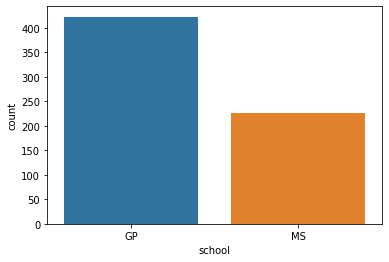

In [549]:
sea.countplot(x = df['school'])

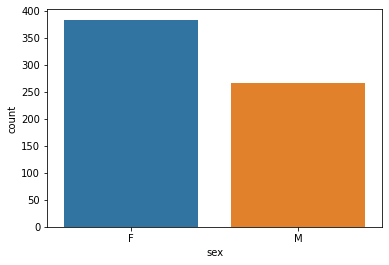

In [550]:
sea.countplot(x = df['sex'])

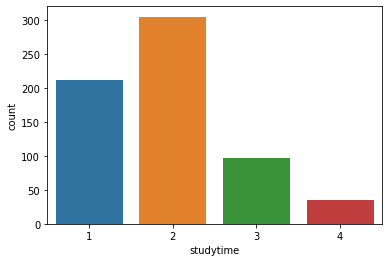

In [551]:
sea.countplot(x = df['studytime'])

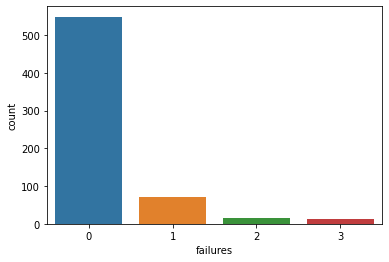

In [552]:
sea.countplot(x = df['failures'])

In [553]:
#sea.pairplot(df)

#Encoding

non numerical to numerical values.

In [554]:
encoder = LabelEncoder()
categorical_col_head = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for value in categorical_col_head:
    df[value] = encoder.fit_transform(df[value])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery     649 non-null    int64
 20  higher      649 non-null    int6

# Co-relation b/w data

school       -0.28
sex          -0.13
age          -0.11
address       0.17
famsize       0.05
Pstatus      -0.00
Medu          0.24
Fedu          0.21
Mjob          0.15
Fjob          0.05
reason        0.12
guardian     -0.08
traveltime   -0.13
studytime     0.25
failures     -0.39
schoolsup    -0.07
famsup        0.06
paid         -0.05
activities    0.06
nursery       0.03
higher        0.33
internet      0.15
romantic     -0.09
famrel        0.06
freetime     -0.12
goout        -0.09
Dalc         -0.20
Walc         -0.18
health       -0.10
absences     -0.09
G1            0.83
G2            0.92
G3            1.00
Name: G3, dtype: float64


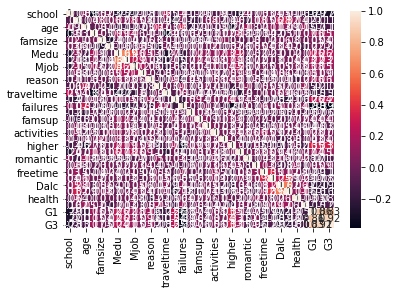

In [555]:
corr = df.corr().round(2)
print(corr['G3'])
sea.heatmap(corr,annot = True)
plt.show()

since all independent values have a consirerable correlation b/w with the dependent variable. We are skipping the feature selection technique

#SPLITTING DATAFRAME

In [556]:
x = df.drop(['G3'],axis=1)
y = df['G3']
print(x.head())
print(y.head())
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state =50)
x_test.shape

   school  sex  age  address  famsize  ...  Walc  health  absences  G1  G2
0       0    0   18        1        0  ...     1       3         4   0  11
1       0    0   17        1        0  ...     1       3         2   9  11
2       0    0   15        1        1  ...     3       3         6  12  13
3       0    0   15        1        0  ...     1       5         0  14  14
4       0    0   16        1        0  ...     2       5         0  11  13

[5 rows x 32 columns]
0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64


(163, 32)

#Linear Model

In [557]:
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Predicting

In [558]:
pred_value = lr.predict(x_test)

Finding the error n Accuracy

In [559]:
mse = mean_squared_error(pred_value,y_test)
r2 = r2_score(y_test,pred_value)
print(r2)
print("Accuracy of linear model = ",r2*100,"%")

0.8297747137401321
Accuracy of linear model =  82.9774713740132 %


#Decision tree model

In [560]:
dt = DTC(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction

In [561]:
y_pred = dt.predict(x_test)

Accuracy

In [562]:
cfm = confusion_matrix(y_test,y_pred)
#print(cfm)
print('Accuracy=',(cfm.diagonal().sum()/len(y_test))*100,'%')

Accuracy= 41.717791411042946 %
